In [ ]:
from pytictoc import TicToc
t = TicToc() #create instance of class

from src.Prep import *
from src.Model import *
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%reload_ext autoreload

In [892]:
%autoreload

In [ ]:
df = Prep().compile()

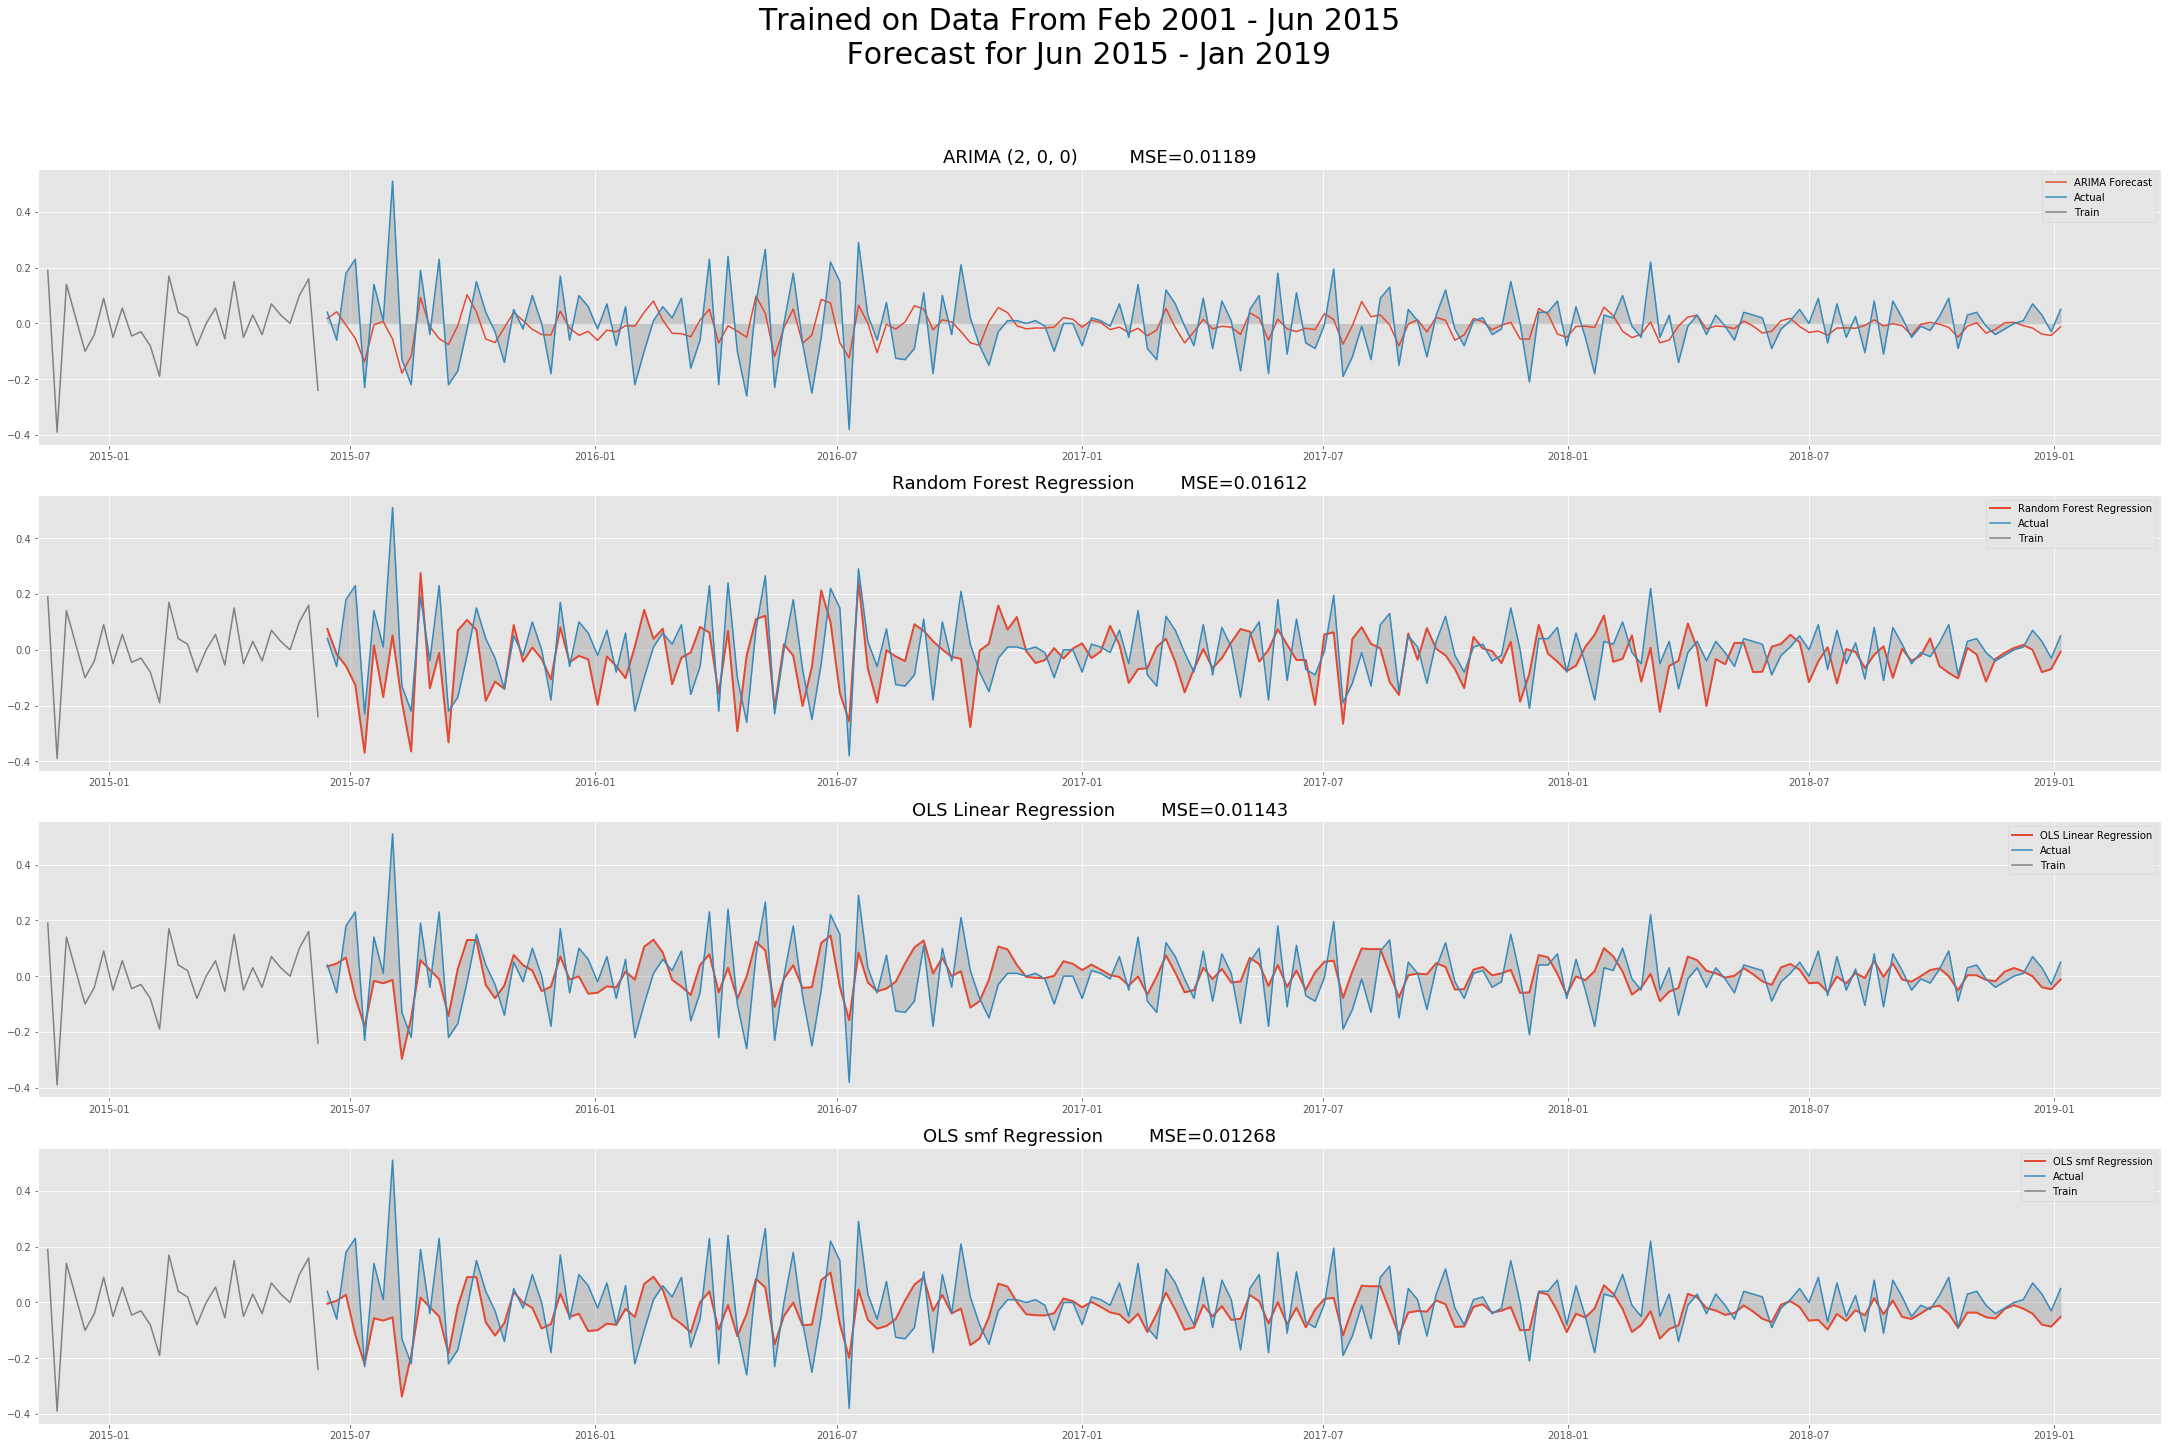

In [182]:
#predetermined order
Models().show_model(df)

In [ ]:
Models(order_method='select').show_model(df)

Please input each parameter


p: 3
d: 0
q: 1


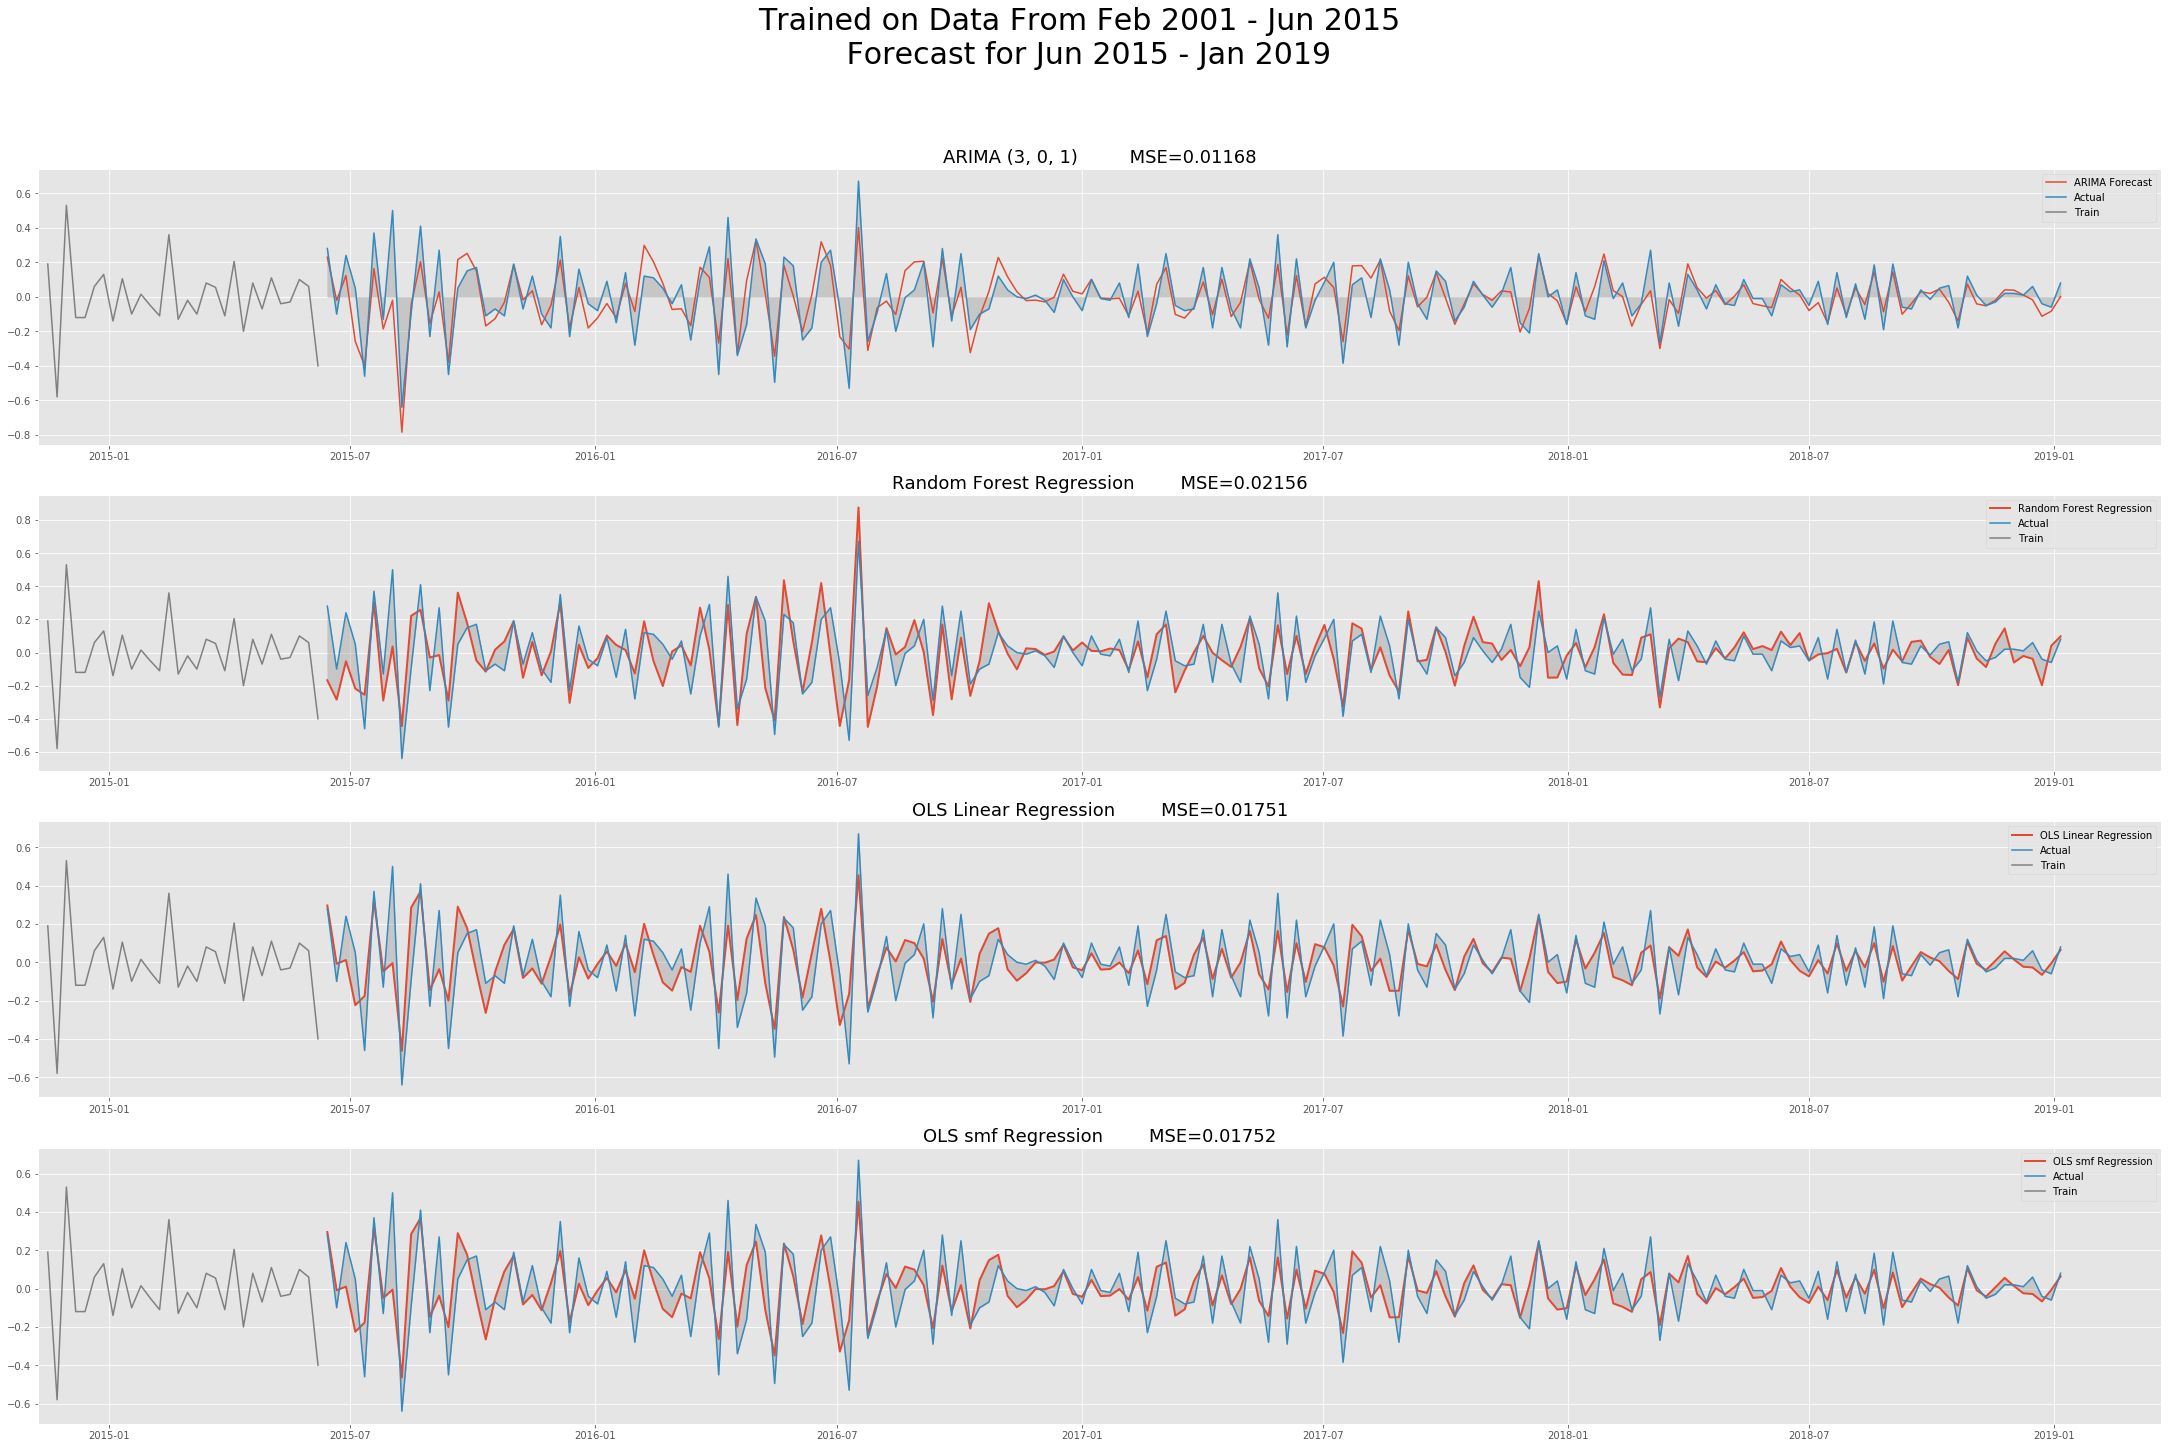

In [7]:
#Second order differenced 
#select order
Models(order_method='select').show_model(df.diff().dropna())

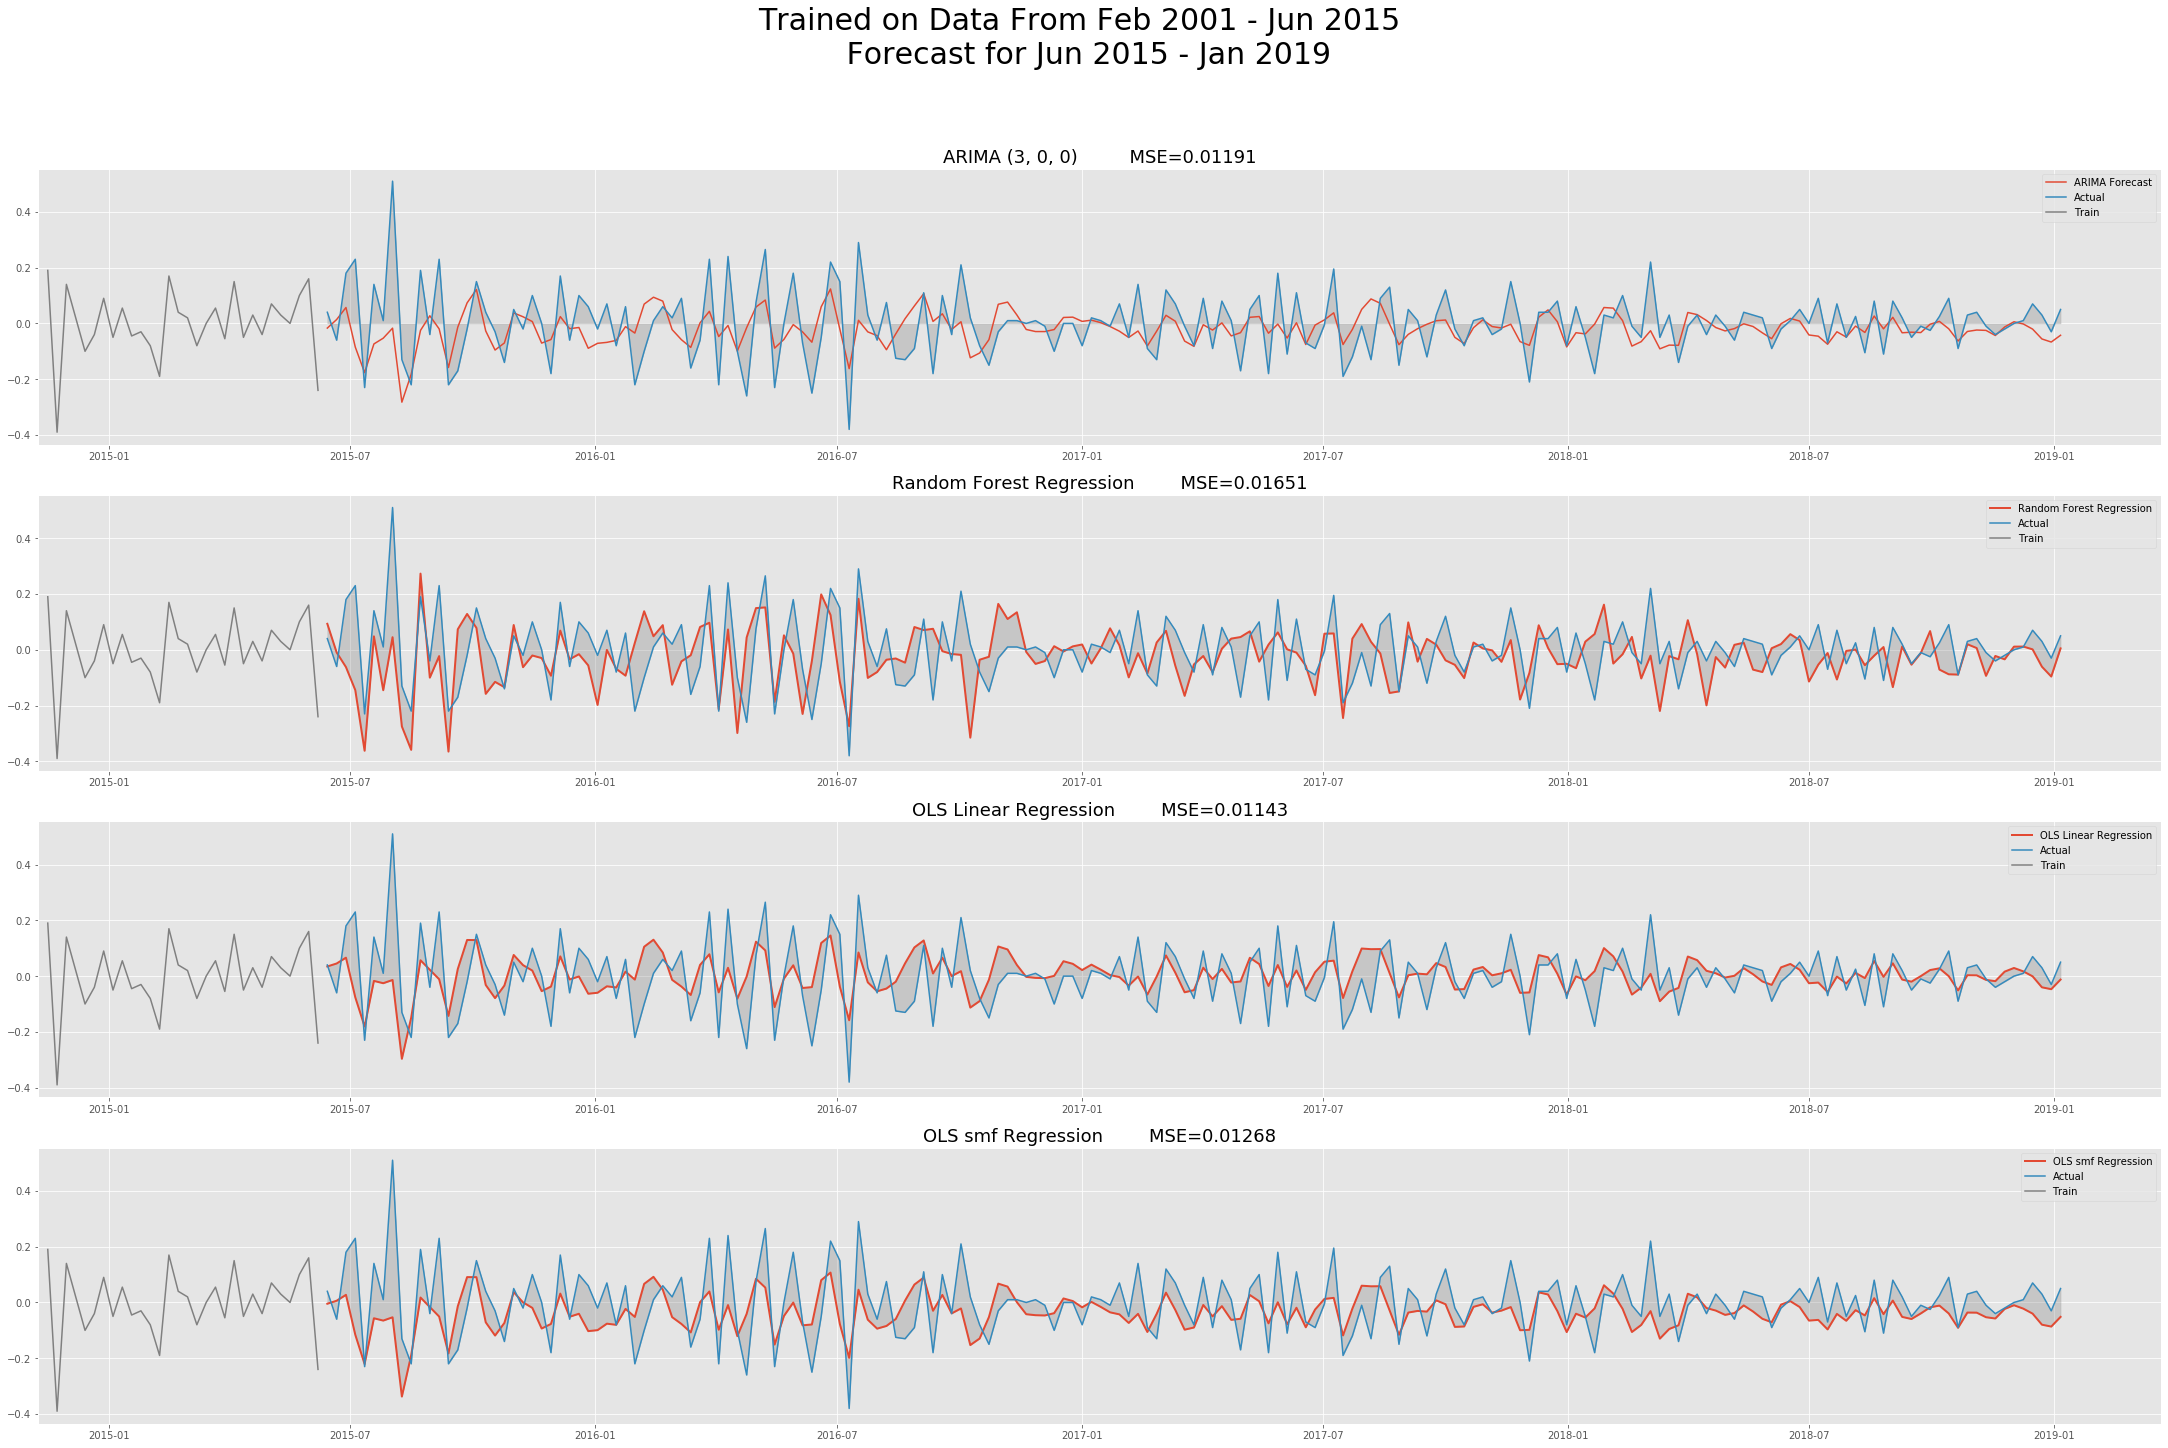

In [186]:
Models(order_method='auto').show_model(df)

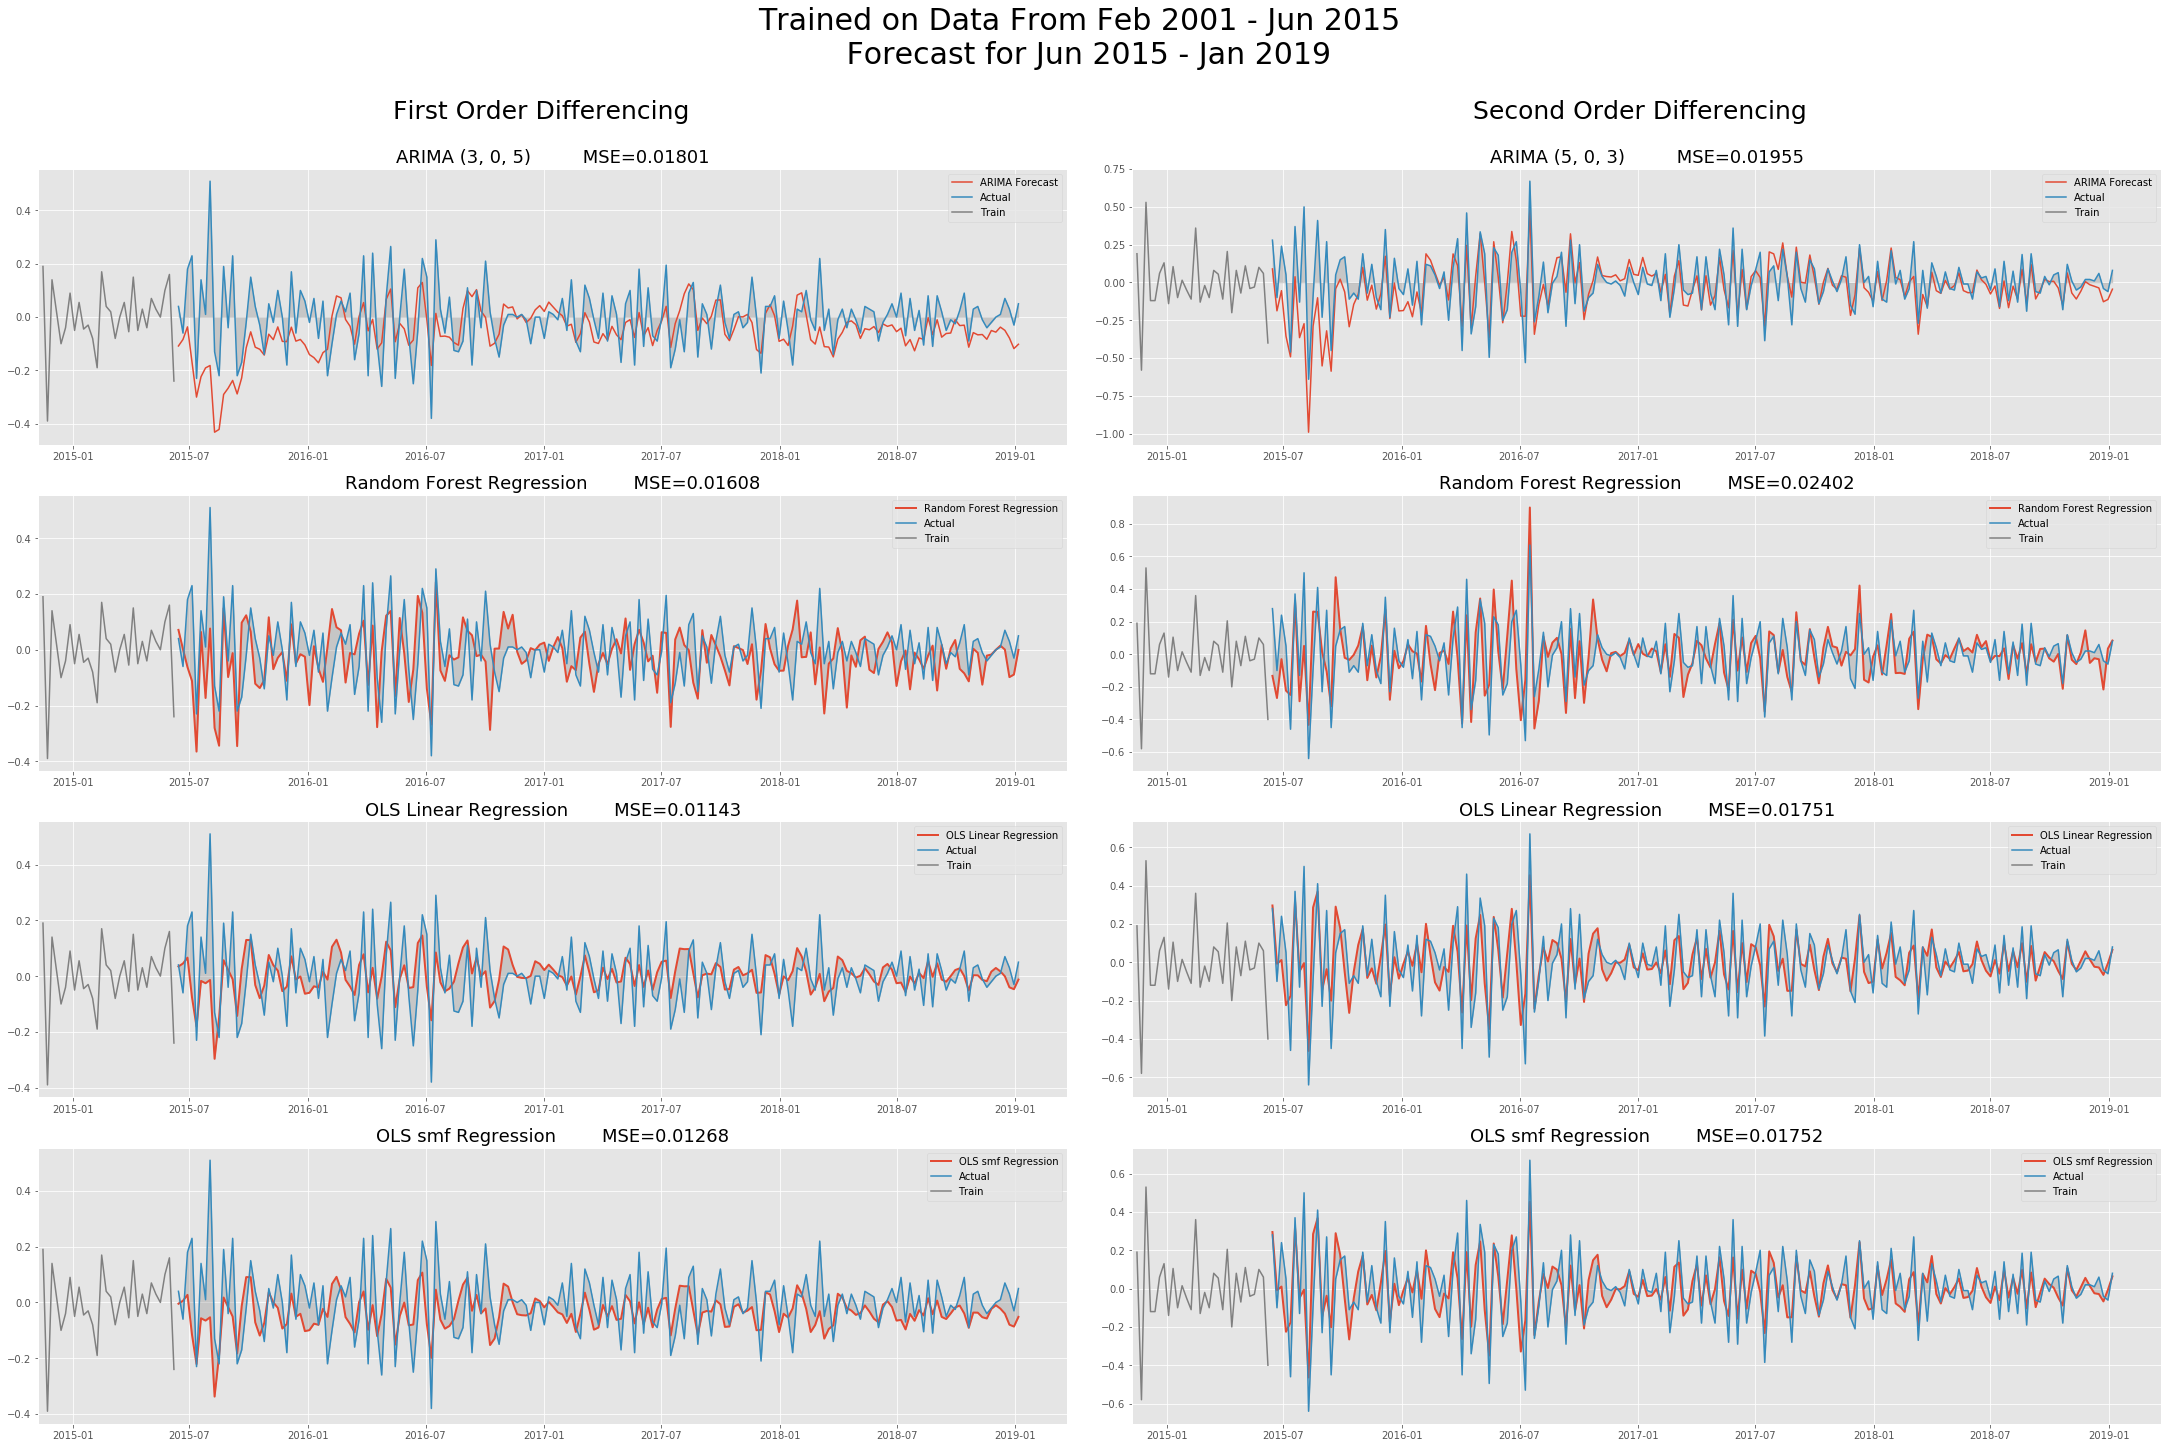

In [6]:
#Auto ARIMA function
Models(order_method='auto').show_models(df)

In [ ]:
#Manual Order Method confirmed 
t.tic()
`Models(order_method='manual').show_model(df)
t.toc()

In [910]:
%autoreload

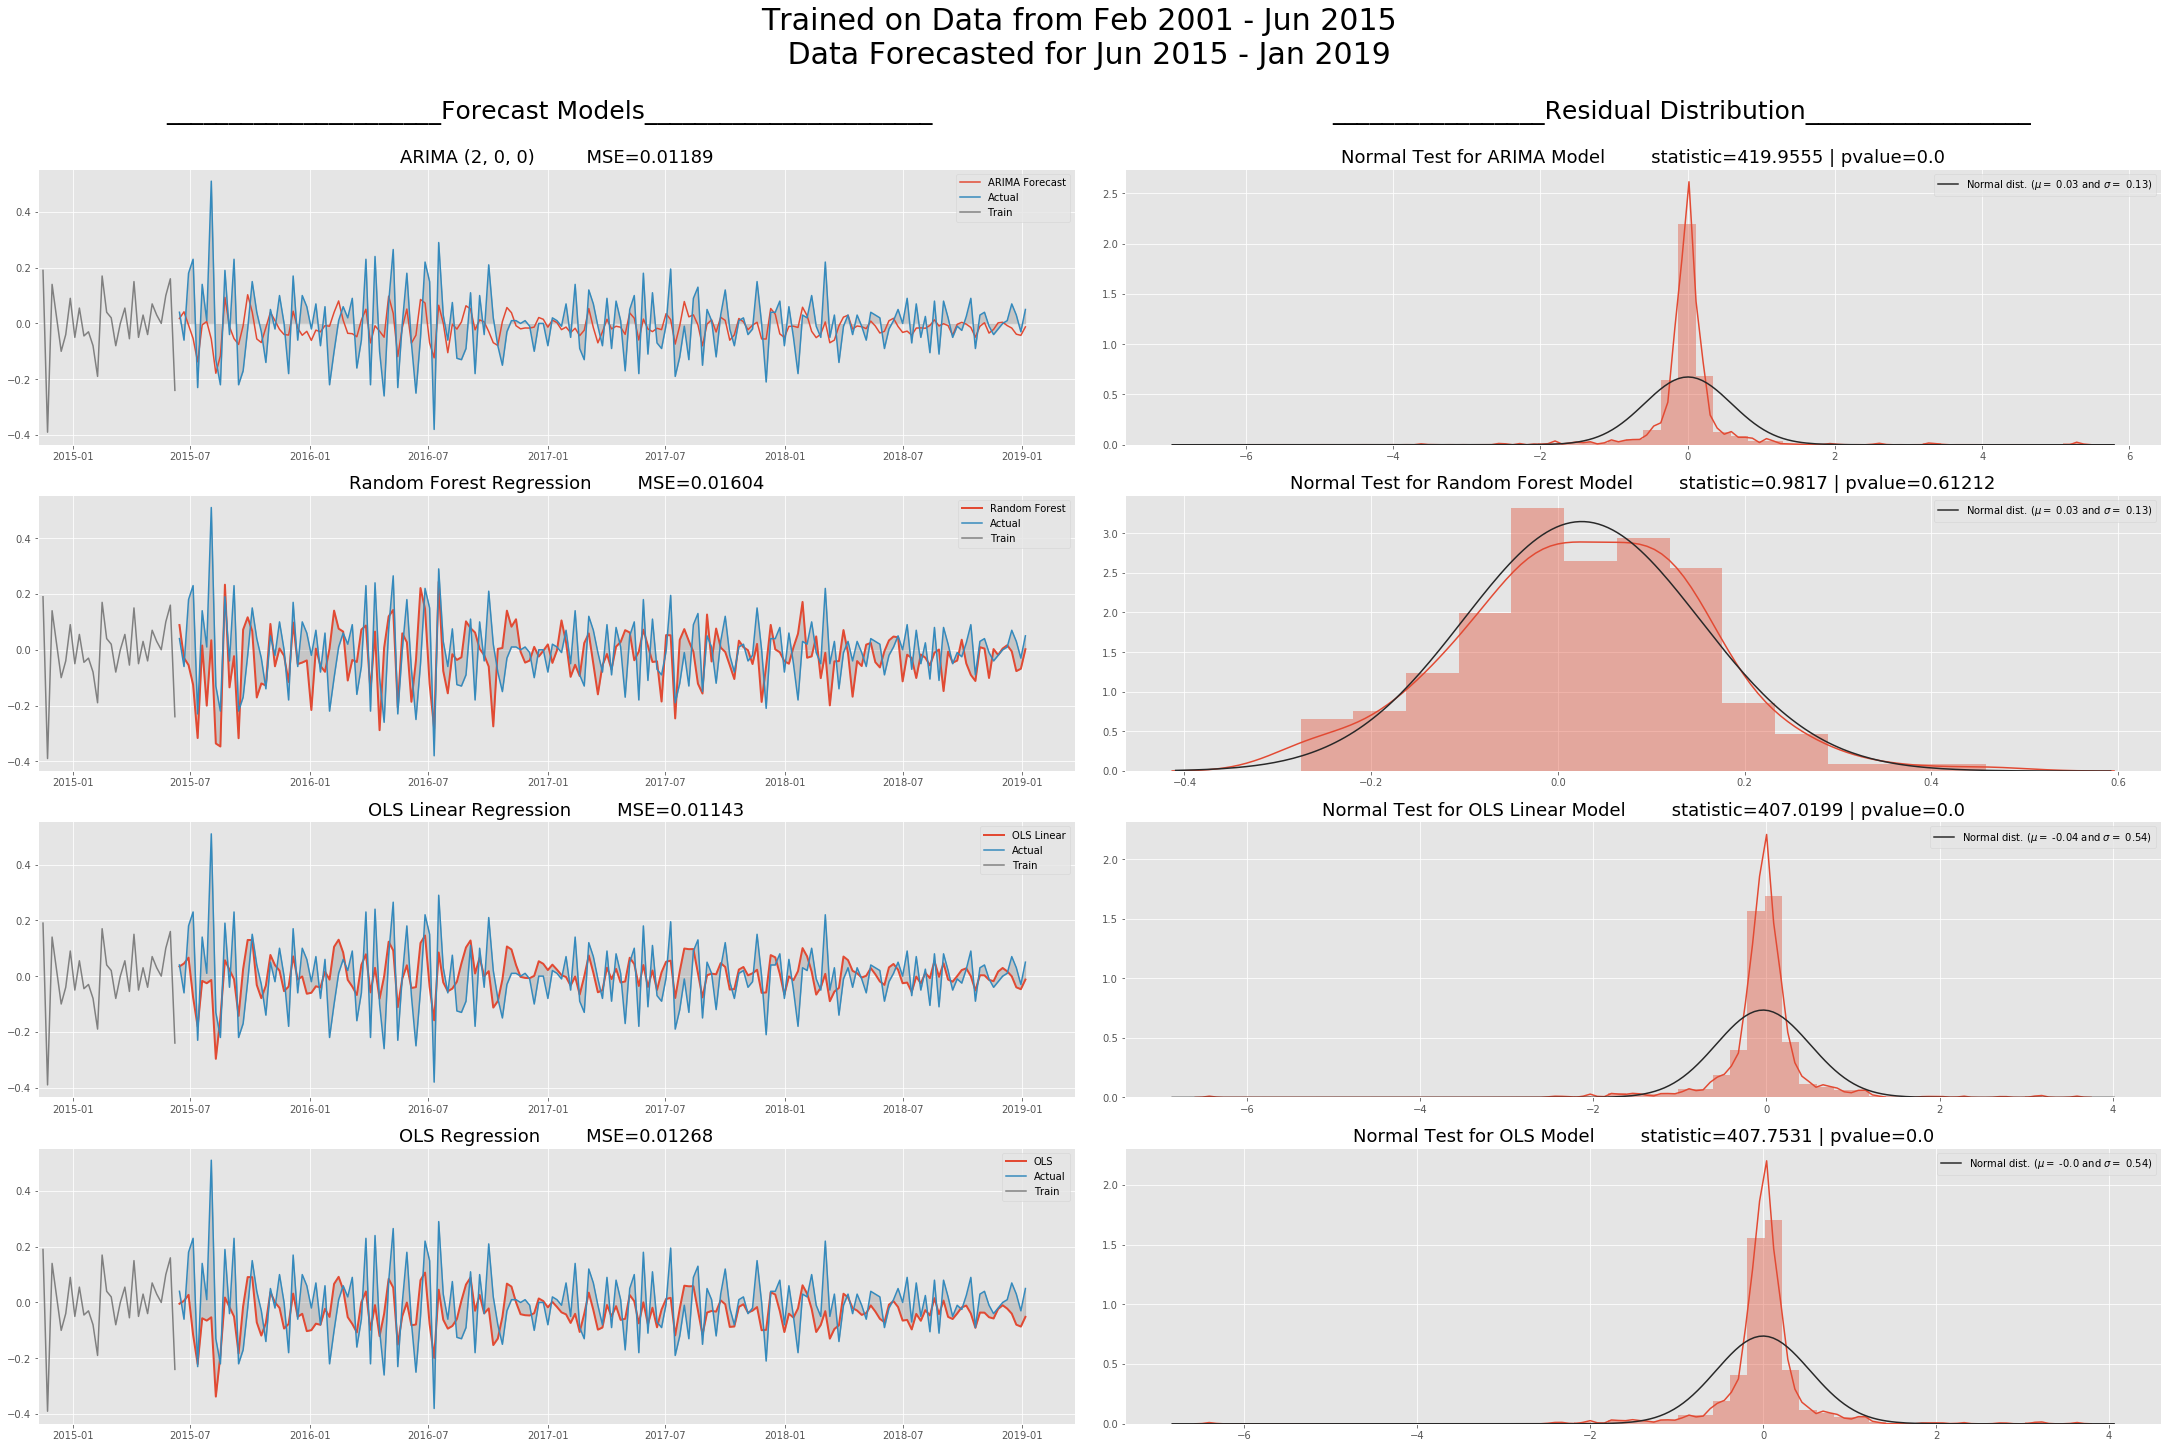

In [911]:
Models().show_model(df)